In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

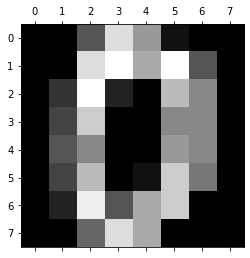

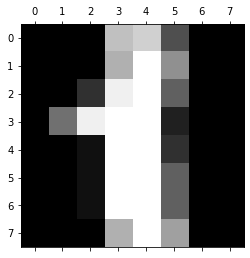

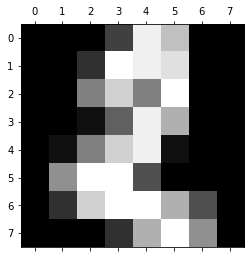

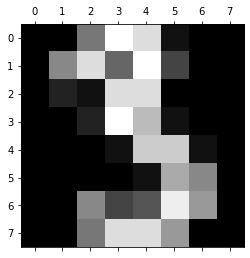

In [17]:
plt.gray()
for i in range (4):
    plt.matshow(digits.images[i])

In [20]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
df['target'] = digits.target

In [23]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [30]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,  Y_train , Y_test = train_test_split(df.drop(['target'] , axis = 1) , digits.target , test_size = 0.2)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [32]:
model.fit(X_train, Y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
model.score(X_test , Y_test)

0.975

In [52]:
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train, Y_train )
model.score(X_test , Y_test)

0.9638888888888889

In [53]:
y_predict = model.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(Y_test , y_predict)
cm

array([[40,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  1],
       [ 1,  1,  0,  0,  0,  0, 37,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  1, 30,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 30]])

Text(69.0, 0.5, 'Truth')

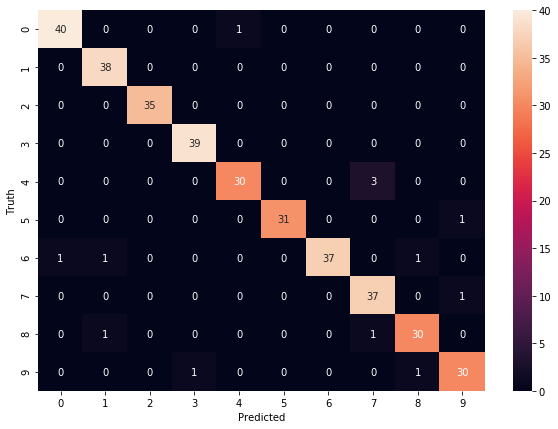

In [55]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm , annot = True)
plt.xlabel('Predicted') 
plt.ylabel('Truth')